In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
data = pd.read_csv("./input/train.csv")

Label: 1


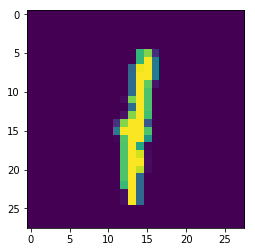

In [8]:
def plot_img(i, X=X, Y=Y):
    print("Label: {}".format(Y[i]))
    plt.close()
    plt.figure()
    plt.imshow(X[i,:,:])
    plt.show()

plot_img(12)

In [3]:
m = len(data)
X = np.array(data.loc[:, data.columns != 'label'])
X = X.reshape(m, 28, 28)
Y = np.array(data['label'])

In [4]:
print("Shape of X: {}, shape of Y: {}".format(X.shape, Y.shape))

Shape of X: (42000, 28, 28), shape of Y: (42000,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [6]:
print("Shape of X_train: {}, shape of y_train: {}".format(X_train.shape, y_train.shape))
print("Shape of X_test: {}, shape of y_test: {}".format(X_test.shape, y_test.shape))

Shape of X_train: (31500, 28, 28), shape of y_train: (31500,)
Shape of X_test: (10500, 28, 28), shape of y_test: (10500,)


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
## adaption of a LeNet

def cnn_model(features, labels, mode):
    #input layer
    input_layer = tf.reshape(features['x'], [-1, 28, 28, 1])
    
    #conv layer 1
    conv1 = tf.layers.conv2d(inputs=input_layer, filters=6, kernel_size=[5, 5], padding="same", activation=tf.nn.relu)
    
    #pooling layer 1
    pool1 = tf.layers.average_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
    
    #conv layer 2
    conv2 = tf.layers.conv2d(inputs=pool1, filters=16, kernel_size=[5, 5], padding="valid", activation=tf.nn.relu)
    
    #pooling layer 2
    pool2 = tf.layers.average_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
    
    #flatten the pooling output to feed in dense layer
    pool2_flat = tf.reshape(pool2, [-1, 5 * 5 * 16])
    
    #dense layer 1
    dense1 = tf.layers.dense(inputs=pool2_flat, units=120, activation=tf.nn.relu)
    
    #dense layer 2
    dense2 = tf.layers.dense(inputs=dense1, units=84, activation=tf.nn.relu)
    
    #logits layer
    logits = tf.layers.dense(inputs=dense2, units=10)
    
    #create dictionary with predicted classes and their probabilities
    predictions = {"classes": tf.argmax(input=logits, axis=1), "probabilities": tf.nn.softmax(logits, name="softmax_tensor")}
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    #calculate loss
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(loss=loss, global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)
    
    eval_metric_ops = {"accuracy": tf.metrics.accuracy(labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [13]:
def main(unused_argv):
    # Create the Estimator
    mnist_classifier = tf.estimator.Estimator(model_fn=cnn_model, model_dir="./tmp/mnist_convnet_model2")
    
    # Train the model
    train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": X_train}, y=y_train, batch_size=100, num_epochs=None, shuffle=True)
    mnist_classifier.train(input_fn=train_input_fn, steps=10000)
    
    return mnist_classifier

In [14]:
mnist_classifier = main(None)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './tmp/mnist_convnet_model2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2ef2d219b0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ./tmp/mnist_convnet_model2/model.ckpt.
INFO:tensorflow:loss = 25.692968, step = 1
INFO:tensorflow:global_step/sec: 264.643
INFO:tensorflow:loss = 1.0365859, step = 101 (0.379 sec)
INFO:tensorflow:global_step/sec: 290.624
INFO:tensorflow:loss = 0.56625605, step = 201 (0.344 sec)
INFO:tensorflow:global_step/sec: 295.163
I

INFO:tensorflow:loss = 0.022532701, step = 7501 (0.299 sec)
INFO:tensorflow:global_step/sec: 331.879
INFO:tensorflow:loss = 0.06520635, step = 7601 (0.301 sec)
INFO:tensorflow:global_step/sec: 340.126
INFO:tensorflow:loss = 0.041950006, step = 7701 (0.294 sec)
INFO:tensorflow:global_step/sec: 313.094
INFO:tensorflow:loss = 0.035071965, step = 7801 (0.320 sec)
INFO:tensorflow:global_step/sec: 333.269
INFO:tensorflow:loss = 0.073177174, step = 7901 (0.300 sec)
INFO:tensorflow:global_step/sec: 316.722
INFO:tensorflow:loss = 0.0249988, step = 8001 (0.316 sec)
INFO:tensorflow:global_step/sec: 325.083
INFO:tensorflow:loss = 0.033503957, step = 8101 (0.308 sec)
INFO:tensorflow:global_step/sec: 315.883
INFO:tensorflow:loss = 0.058085203, step = 8201 (0.316 sec)
INFO:tensorflow:global_step/sec: 331.04
INFO:tensorflow:loss = 0.039822113, step = 8301 (0.302 sec)
INFO:tensorflow:global_step/sec: 319.299
INFO:tensorflow:loss = 0.02725768, step = 8401 (0.313 sec)
INFO:tensorflow:global_step/sec: 322

In [15]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": X_test}, num_epochs=1, shuffle=False)
p = list(mnist_classifier.predict(input_fn=test_input_fn))

INFO:tensorflow:Restoring parameters from ./tmp/mnist_convnet_model2/model.ckpt-10000


In [16]:
pred = [i['classes'] for i in p]

### after 10000 steps

In [17]:
print(pred[:10])
print(y_test[:10])

[3, 6, 9, 5, 6, 5, 6, 0, 0, 1]
[3 6 9 5 6 5 6 0 0 1]


In [18]:
cm = tf.confusion_matrix(y_test, pred, num_classes=10)
with tf.Session() as sess:
    print(sess.run(cm))

[[1000    0    1    0    0    1    5    2    2    4]
 [   0 1180    2    1    2    0    1    2    2    0]
 [   3    7 1041    5    1    0    4    9    7    0]
 [   0    0    9 1032    1    8    1    5    7    7]
 [   1    4    0    0 1017    0    2    3    1    6]
 [   0    0    1    4    0  909    6    1    7    2]
 [   1    1    2    0    4    4 1030    0    2    0]
 [   1    6    8    0    4    3    0 1098    3    6]
 [   3    3    0    3    2    2    9    0  965    8]
 [   3    1    1    2    9    2    3    9    5  981]]


# make predictions

In [19]:
submdata = pd.read_csv("./input/test.csv")

In [20]:
m = len(submdata)
X_subm = np.array(submdata)
X_subm = X_subm.reshape(m, 28, 28)
X_subm = X_subm.astype('float32')
print(len(X_subm))

28000


In [21]:
subm_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": X_subm}, num_epochs=1, shuffle=False)
psubm = list(mnist_classifier.predict(input_fn=subm_input_fn))

INFO:tensorflow:Restoring parameters from ./tmp/mnist_convnet_model2/model.ckpt-10000


In [22]:
pred = [i['classes'] for i in psubm]

In [23]:
subm = pd.DataFrame({"ImageId": np.arange(1,m+1), "Label": pred})
subm.to_csv("subm2.csv", index=False)